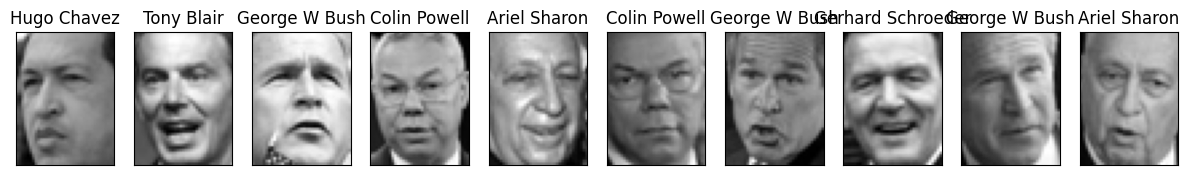

C:\Users\hepsi\AppData\Local\Temp\ipykernel_10308\282394006.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette="viridis")


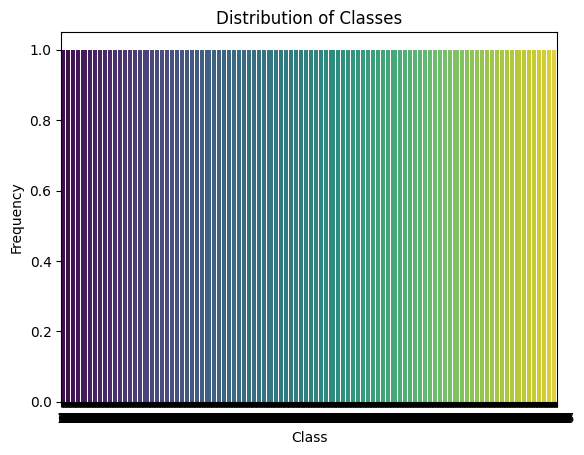

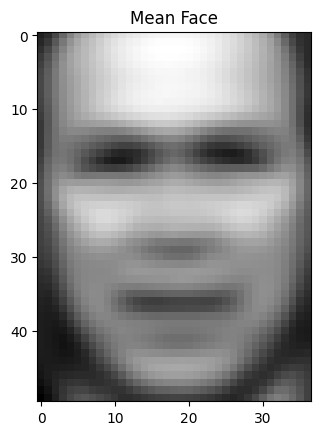

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        18
     Colin Powell       0.78      0.88      0.83        69
  Donald Rumsfeld       0.80      0.71      0.75        34
    George W Bush       0.92      0.93      0.92       166
Gerhard Schroeder       0.77      0.74      0.75        31
      Hugo Chavez       0.92      0.63      0.75        19
       Tony Blair       0.86      0.86      0.86        50

         accuracy                           0.85       387
        macro avg       0.82      0.77      0.79       387
     weighted avg       0.85      0.85      0.85       387



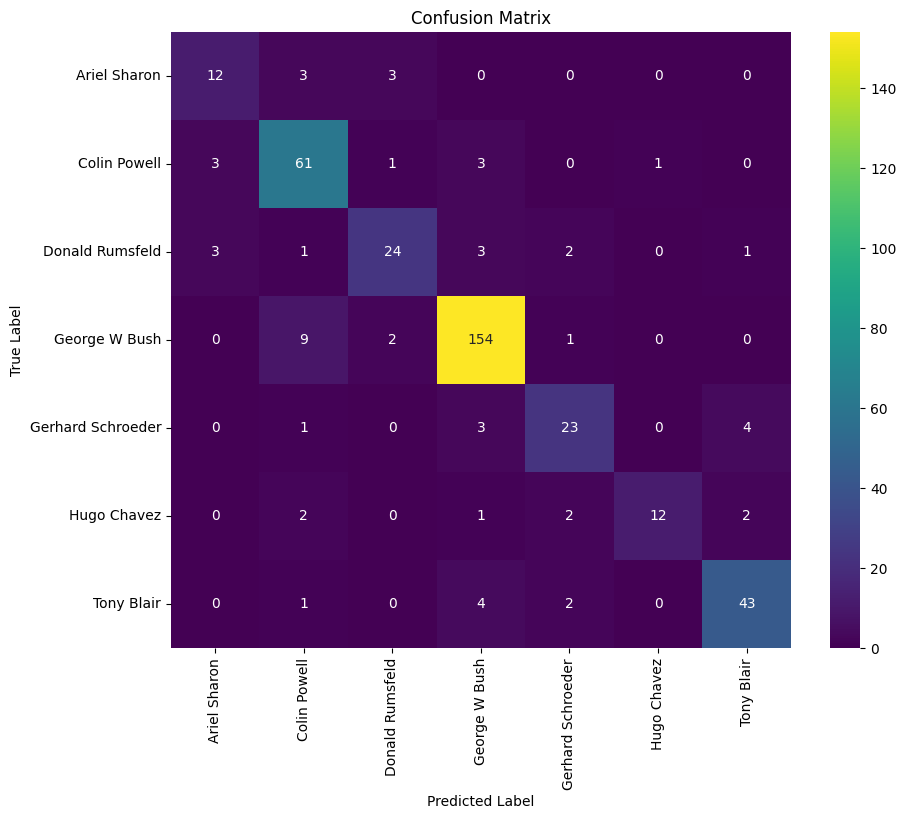

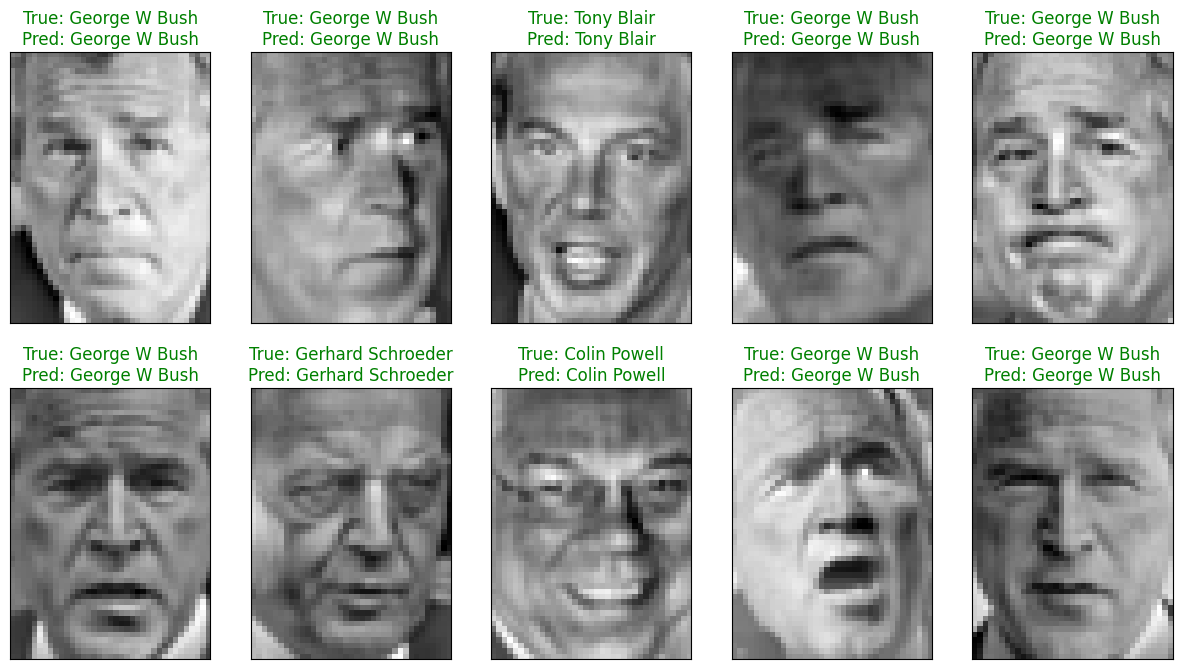

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

# Display a few example images
fig, axes = plt.subplots(1, 10, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes):
    ax.imshow(lfw_people.images[i], cmap=plt.cm.gray)
    ax.set_title(target_names[y[i]])
plt.show()

# Normalize the pixel values
X_scaled = StandardScaler().fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Distribution of classes
sns.countplot(y, palette="viridis")
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Mean face
mean_face = np.mean(lfw_people.images, axis=0)
plt.imshow(mean_face, cmap=plt.cm.gray)
plt.title("Mean Face")
plt.show()

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Example of correct and incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(h, w), cmap=plt.cm.gray)
    true_label = target_names[y_test[i]]
    pred_label = target_names[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=("green" if true_label == pred_label else "red"))

plt.show()


Number of samples: 1288
Image shape: 50x37
Number of classes: 7


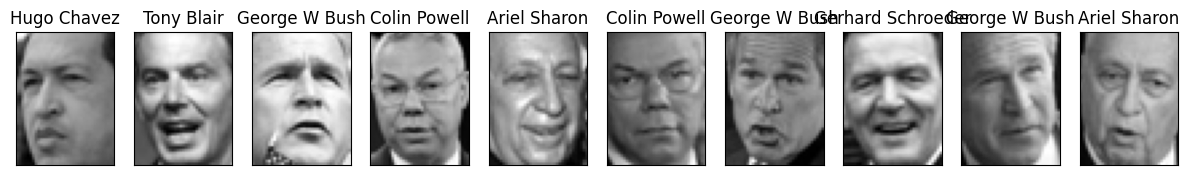

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Load dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

print(f"Number of samples: {n_samples}")
print(f"Image shape: {h}x{w}")
print(f"Number of classes: {len(target_names)}")

# Display a few example images
fig, axes = plt.subplots(1, 10, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes):
    ax.imshow(lfw_people.images[i], cmap=plt.cm.gray)
    ax.set_title(target_names[y[i]])
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the pixel values
X_scaled = StandardScaler().fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Training samples: 901
Test samples: 387


C:\Users\hepsi\AppData\Local\Temp\ipykernel_10308\3738366160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette="viridis")


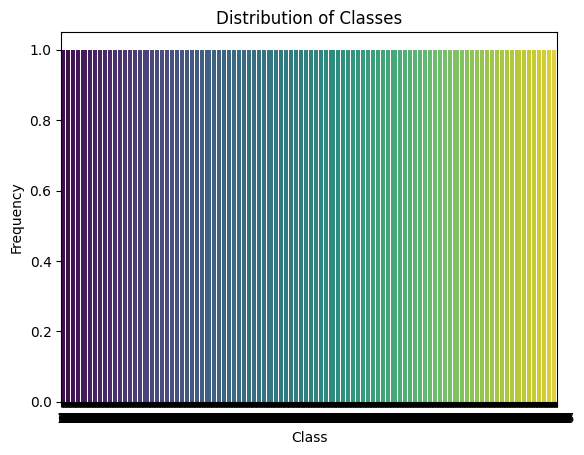

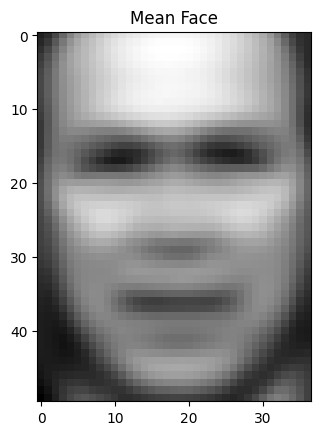

In [3]:
import seaborn as sns
import pandas as pd

# Distribution of classes
sns.countplot(y, palette="viridis")
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Mean face
mean_face = np.mean(lfw_people.images, axis=0)
plt.imshow(mean_face, cmap=plt.cm.gray)
plt.title("Mean Face")
plt.show()


                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        18
     Colin Powell       0.78      0.88      0.83        69
  Donald Rumsfeld       0.80      0.71      0.75        34
    George W Bush       0.92      0.93      0.92       166
Gerhard Schroeder       0.77      0.74      0.75        31
      Hugo Chavez       0.92      0.63      0.75        19
       Tony Blair       0.86      0.86      0.86        50

         accuracy                           0.85       387
        macro avg       0.82      0.77      0.79       387
     weighted avg       0.85      0.85      0.85       387



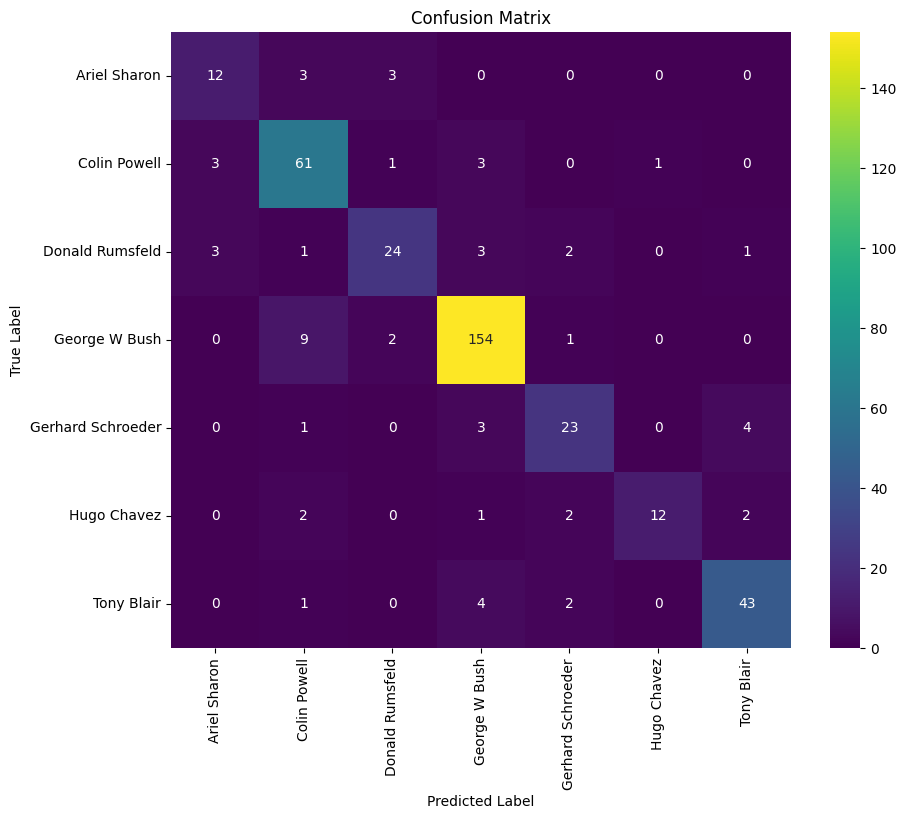

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


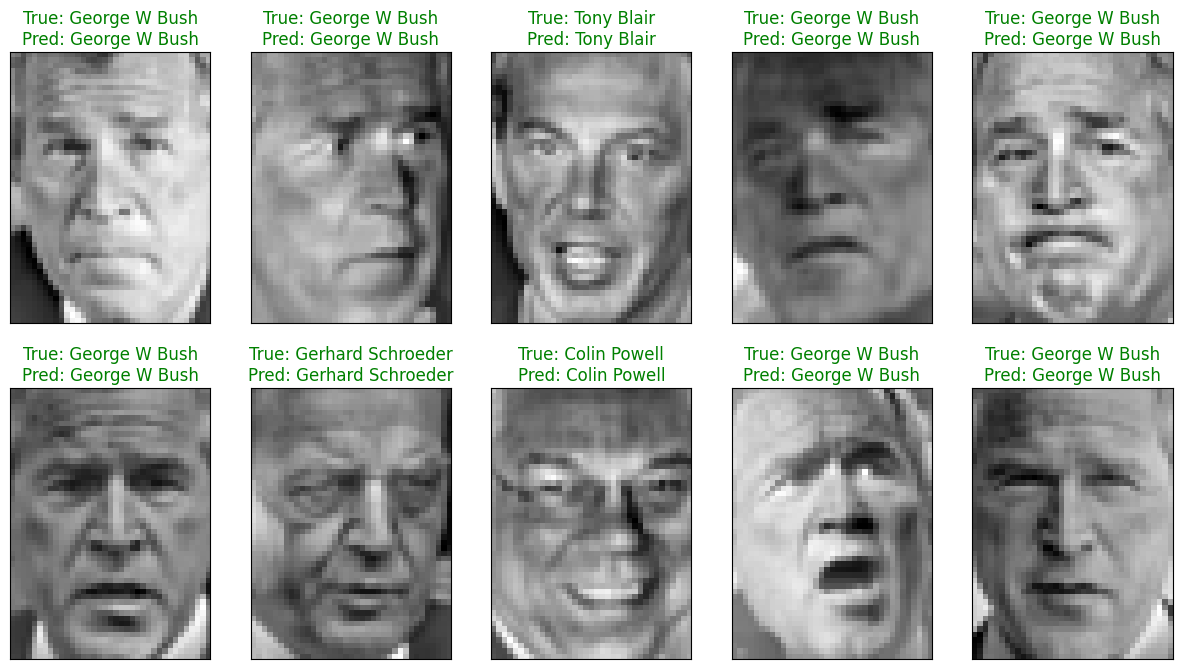

In [5]:
# Example of correct and incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(h, w), cmap=plt.cm.gray)
    true_label = target_names[y_test[i]]
    pred_label = target_names[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=("green" if true_label == pred_label else "red"))

plt.show()


Number of samples: 1288
Image shape: 50x37
Number of classes: 7


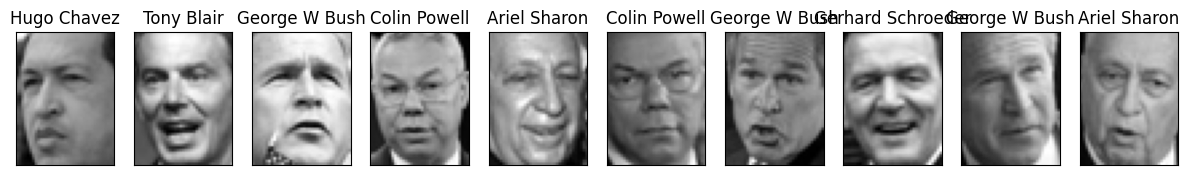

Training samples: 901
Test samples: 387


C:\Users\hepsi\AppData\Local\Temp\ipykernel_10308\2887406909.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette="viridis")


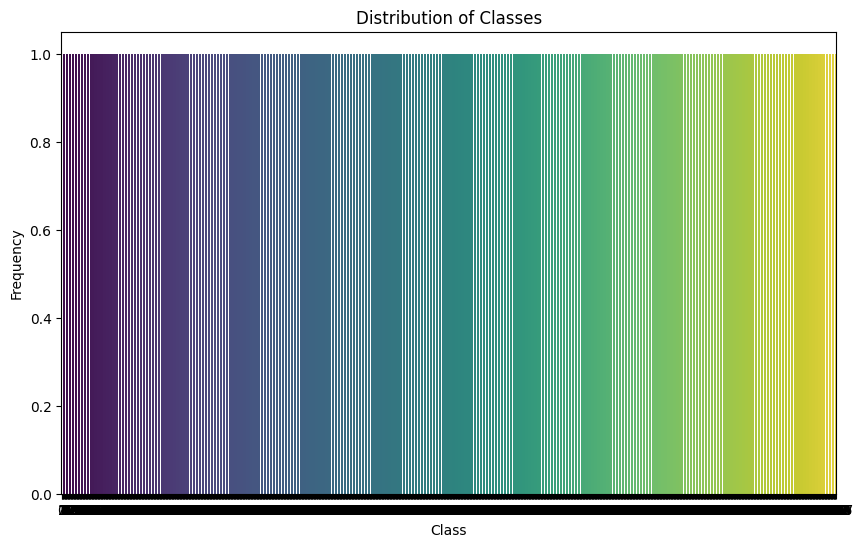

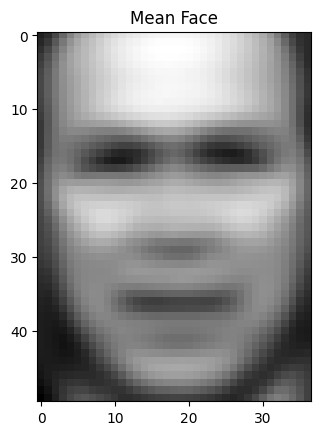

Classification Report:

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        18
     Colin Powell       0.78      0.88      0.83        69
  Donald Rumsfeld       0.80      0.71      0.75        34
    George W Bush       0.92      0.93      0.92       166
Gerhard Schroeder       0.77      0.74      0.75        31
      Hugo Chavez       0.92      0.63      0.75        19
       Tony Blair       0.86      0.86      0.86        50

         accuracy                           0.85       387
        macro avg       0.82      0.77      0.79       387
     weighted avg       0.85      0.85      0.85       387



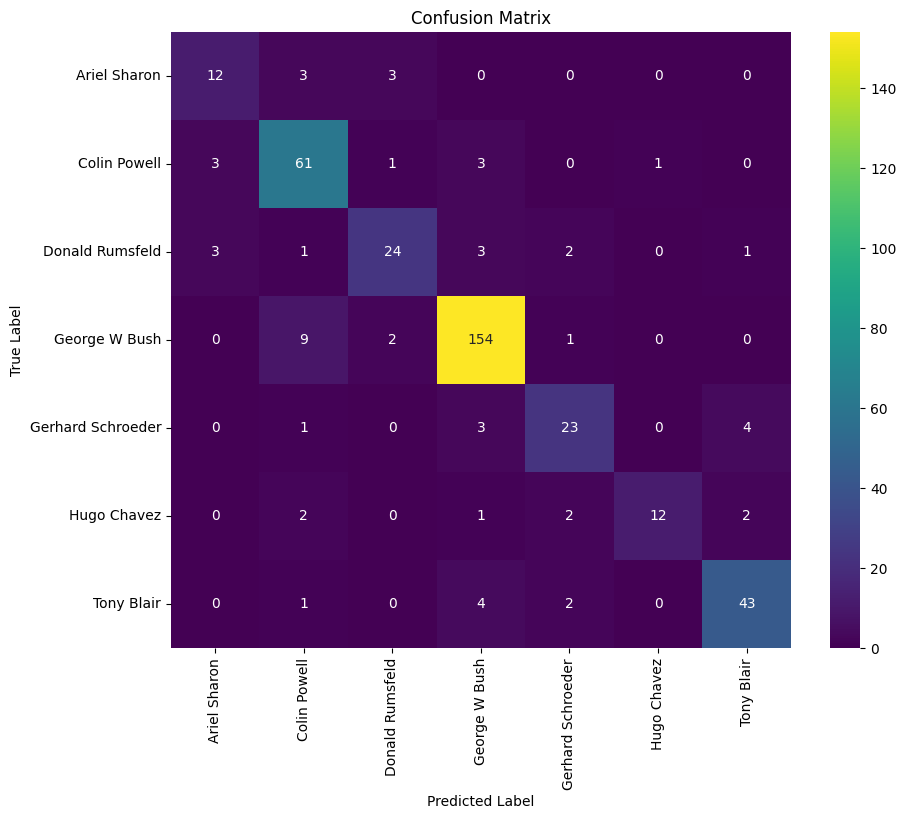

Accuracy Score: 0.85


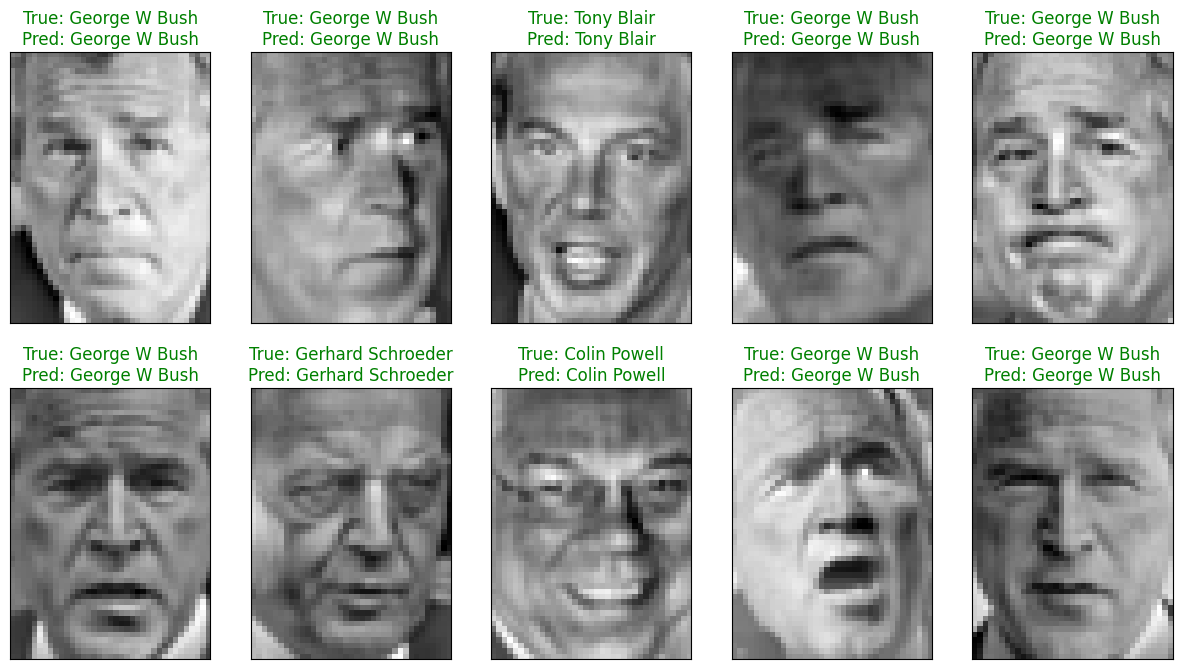

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Load dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

print(f"Number of samples: {n_samples}")
print(f"Image shape: {h}x{w}")
print(f"Number of classes: {len(target_names)}")

# Display a few example images
fig, axes = plt.subplots(1, 10, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes):
    ax.imshow(lfw_people.images[i], cmap=plt.cm.gray)
    ax.set_title(target_names[y[i]])
plt.show()

# Normalize the pixel values
X_scaled = StandardScaler().fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(y, palette="viridis")
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Mean face
mean_face = np.mean(lfw_people.images, axis=0)
plt.imshow(mean_face, cmap=plt.cm.gray)
plt.title("Mean Face")
plt.show()

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Example of correct and incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(h, w), cmap=plt.cm.gray)
    true_label = target_names[y_test[i]]
    pred_label = target_names[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=("green" if true_label == pred_label else "red"))

plt.show()
